# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
import scipy.optimize as opt

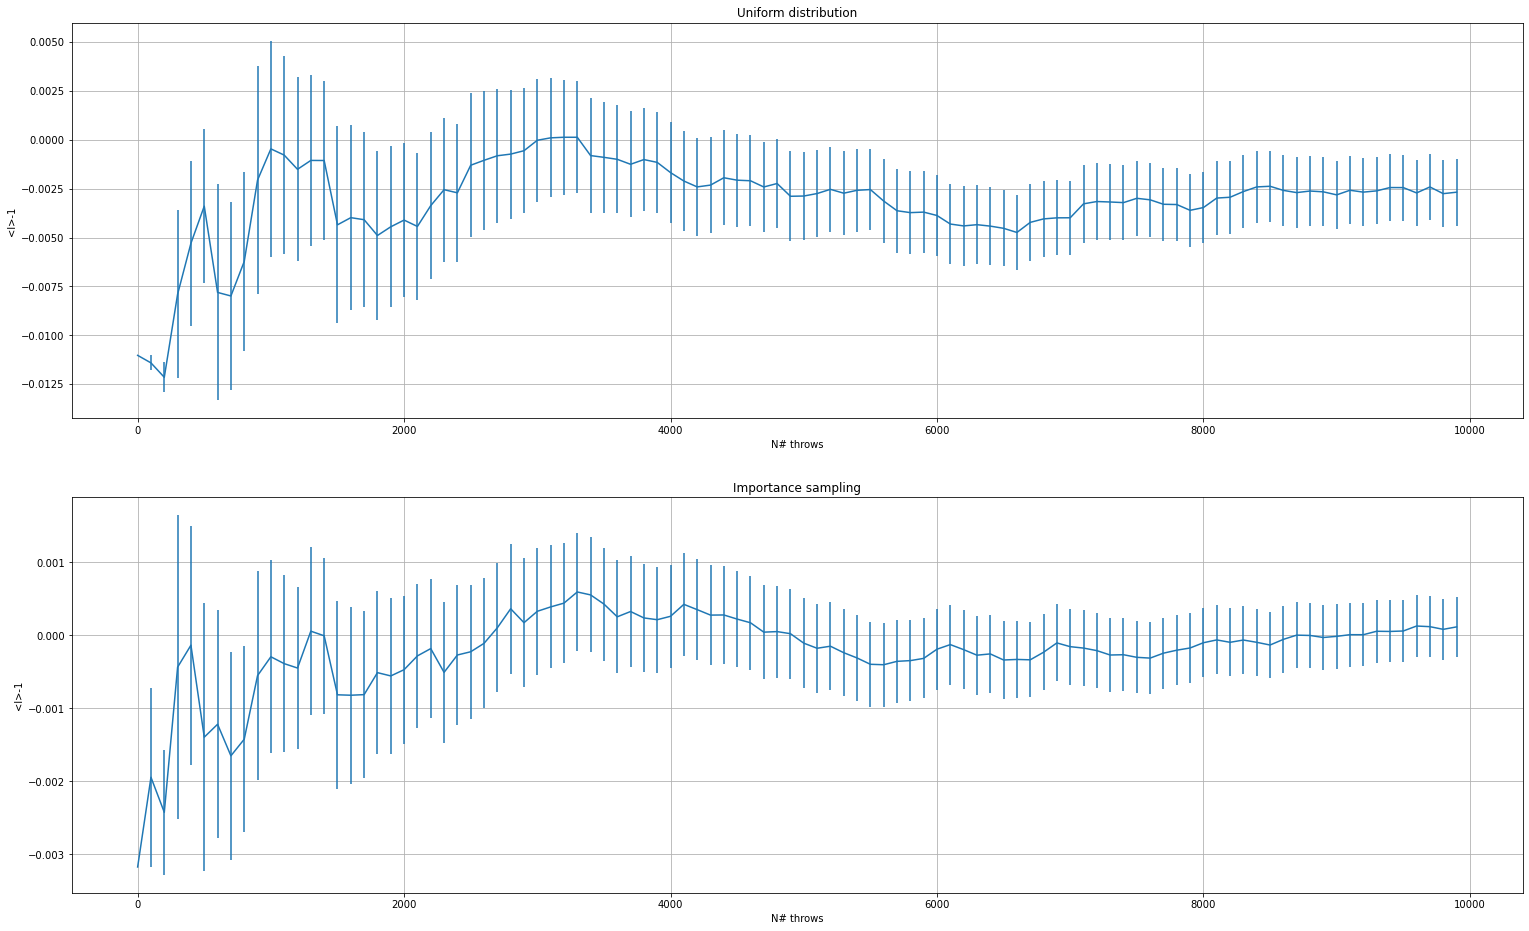

In [5]:
point = []
err= []
for i in range (0,2):
    file = open("2.1/plot" + str(i+1) + ".out")
    rude = file.read()
    data = rude.split(' ')
    n=int((len(data)-1)/2)
    x = np.zeros(n)
    y = np.zeros(n)
    file.close()
    for j in range(0,n):
        x[j] = float(data[ 2 * j ] )
        y[j] = float(data[ 2 * j + 1 ] )
    point.append(x)
    err.append(y)
    
S = ["Uniform distribution", "Importance sampling"]
fig, axx = plt.subplots(2, 1, figsize=(26, 16))
axx = axx.reshape(-1)

for s in range(2):
    ax = axx[s]
    ax.set_title(S[s])
    ax.errorbar(np.arange(n)*100 , point[s] , yerr=err[s])
    ax.set_xlabel(r"N# throws")
    ax.set_ylabel('<I>-1')
    ax.grid()

I made a prediction of the integral above in 2 ways. In both the cases I used blocking average with a total amount of $M = 10^5$ throws in $N=100$ blocks.
- The first estimation of the integral has been carried out using a uniform distribution $\in (0,1) $ and using the value of $f(x) = \frac{\pi}{2}\cos(\frac{\pi}{2} x)$. 
 - The second was done using importance sampling. I integrated the function using a non-uniform pdf, giving more "importance" to those parts of the function that changes faster. So it is useful to use a normalized Taylor expansion (first order) in $x=1$ (not in $x=0$ beacuse there we have $f'(x) = 0$). So we have $ p(x) = 2(1-x) $. Its cdf is invertible in our interval. 

As we can see from the graph, both the predictions are compatible with the true value of the integral. The importance sampling has a lower uncertainty than the one of the uniform sampling. 

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

In [91]:
def f( x, k ):
    return k*np.sqrt(x); 
x = np.linspace(1,100,100)
S = ["Discrete RW", "Continuos RW"]

Best a for the Discrete RW is [0.99897439]
Best a for the Continuos RW is [1.0000868]


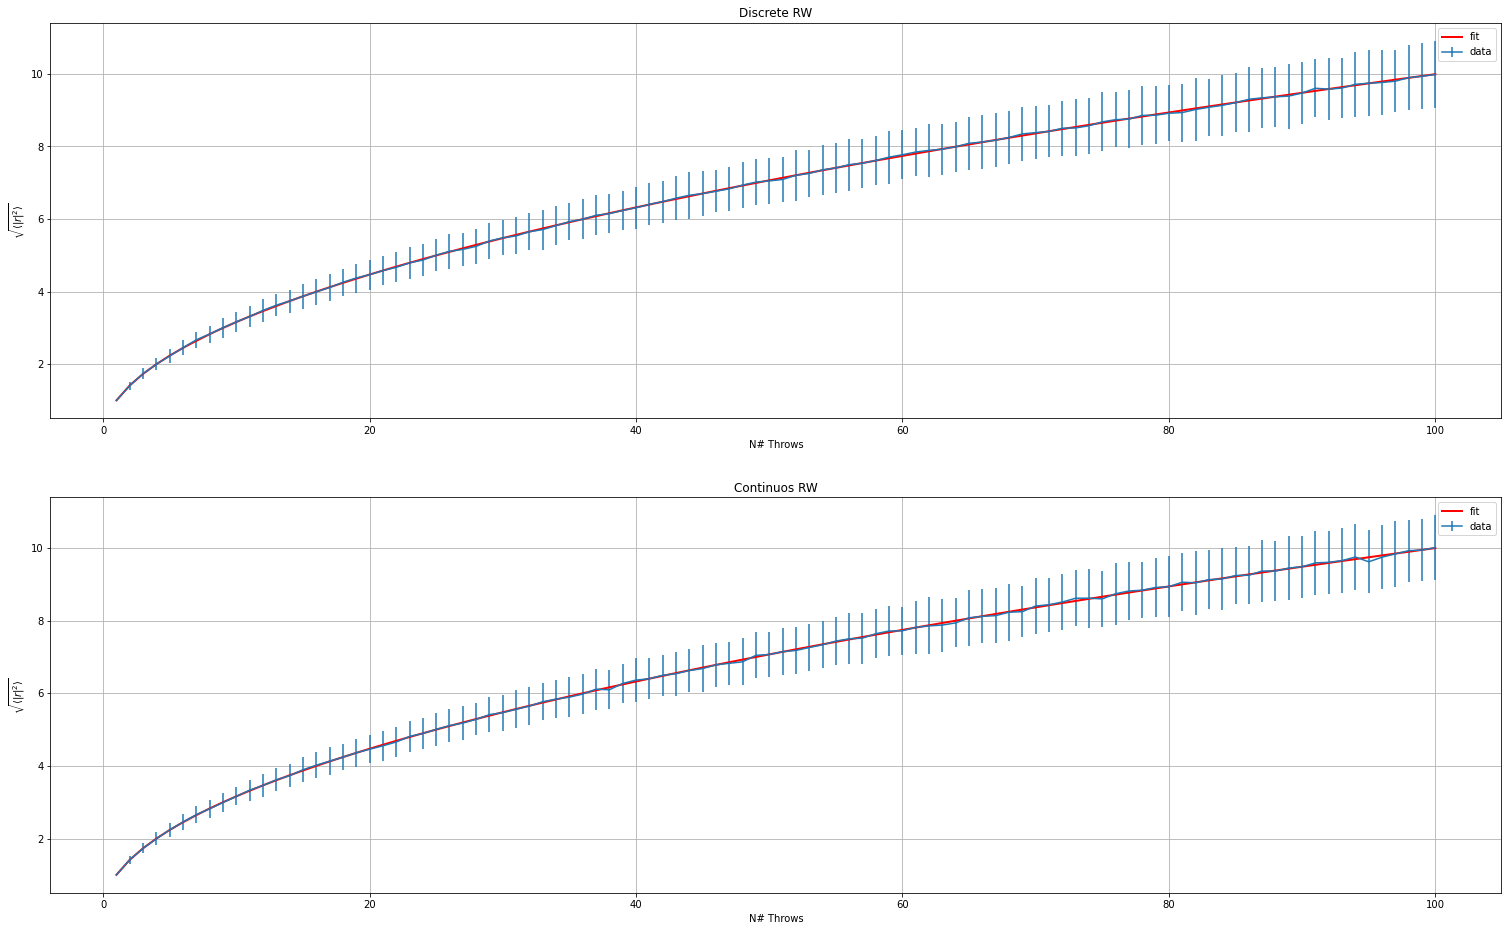

In [92]:
point = []
err= []
for i in range (0,2):
    file = open("2.2/plot" + str(i+1) + ".out")
    rude = file.read()
    data = rude.split(' ')
    n=int((len(data)-1)/2)
    dati = np.zeros(n)
    yerr = np.zeros(n)
    file.close()
    for j in range(0,n):
        dati[j] = float(data[ 2 * j ] )
        yerr[j] = float(data[ 2 * j + 1 ] )
    point.append(dati)
    err.append(yerr)
fig, axx = plt.subplots(2, 1, figsize=(26, 16))
axx = axx.reshape(-1)
for s in range(2):
    ax = axx[s]
    ax.set_title(S[s])
    ax.errorbar(x, point[s] , yerr=err[s], label = 'data')
    ax.set_xlabel(r"N# Throws")
    ax.set_ylabel(r"$\sqrt{\langle |{r}|^2 \rangle}$")
    ax.grid()
    c = opt.curve_fit(f,x,point[s])[0]
    ax.plot(x, c*np.sqrt(x), linewidth = 2, color = 'red', label ='fit')
    ax.legend()
    print(f"Best a for the {S[s]} is {c}")

These two graphs are the plot of  $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ obtained by a simulation of a Random walk in a discrete and continuos case, using $M=10^4$ simulation and $N=100$ blocks.

I fitted the obtained graph with a function $f(N) = k \ \sqrt{N} $. From the fit the coefficient $k$ seems to be really near to $k=1$. Note that in the fit I didn't considered the first date, because the function starts at $(0,0)$, while our data start from $(0,1)$.

Anyway, as the coefficient can be considered as $k=1$ for large N, our system has a diffusive behaviour.